# Classification Project

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import zipcodes as zcode

## Import Data

In [2]:
Data = pd.read_csv("E:\hamid\hushe masnue imt1\Data\Bank classification Project\Bank_Personal_Loan_Modelling.csv")
Data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


### Describe Columns
- ID : Customer id
- Age : Customer's Age in completed years
- Experience : Year of perfessional experience
- Income : Annual income of customer
- ZIP Code : Home address ZIP Code
- Family : Family size of the customer
- CCAvg : Avg.spendig on credit card per month
- Education : Education level
                undergrade = 1
                graduate = 2
                Advanced/Professional = 3
                            
- Mortgage : Value of house mortgage if any
- Securities Account : Does the customer have a securities account with the bank
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank
- Online : Does the customer use internet banking facilities?
- CreditCard : Does the customer use a credit card issued by universal bank?

#### Target : Personal Loan : Did this customer accept the personal loan offered in the last campaign 
        0 : No
        1 : Yes
        

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [4]:
# Change CCAvg from obj to float
Data['CCAvg'] = Data['CCAvg'].str.replace(r'\D', '.')
Data["CCAvg"] = Data["CCAvg"].astype(float)

In [5]:
Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### we saw negative exprience we have to posititve theme.

In [6]:
Data['Experience'] = abs(Data["Experience"])
Data["Experience"].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# Cleaning Data 

In [7]:
# Drop ID because it's unique for every sample and doesn't provide any useful information

Data = Data.drop("ID", axis=1)
Data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [8]:
Data["ZIP Code"].nunique()

467

## Check Noise

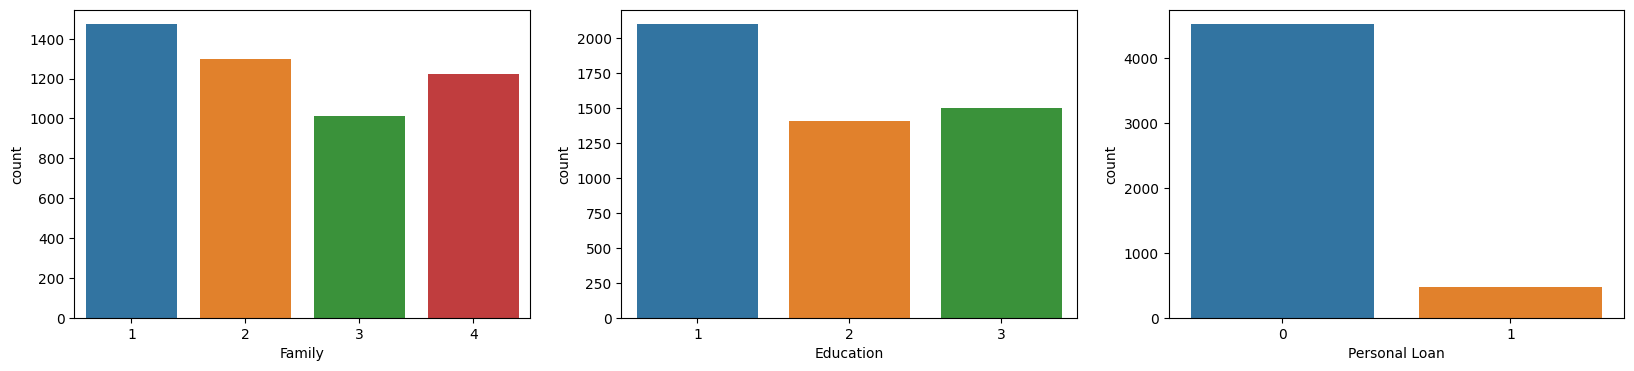

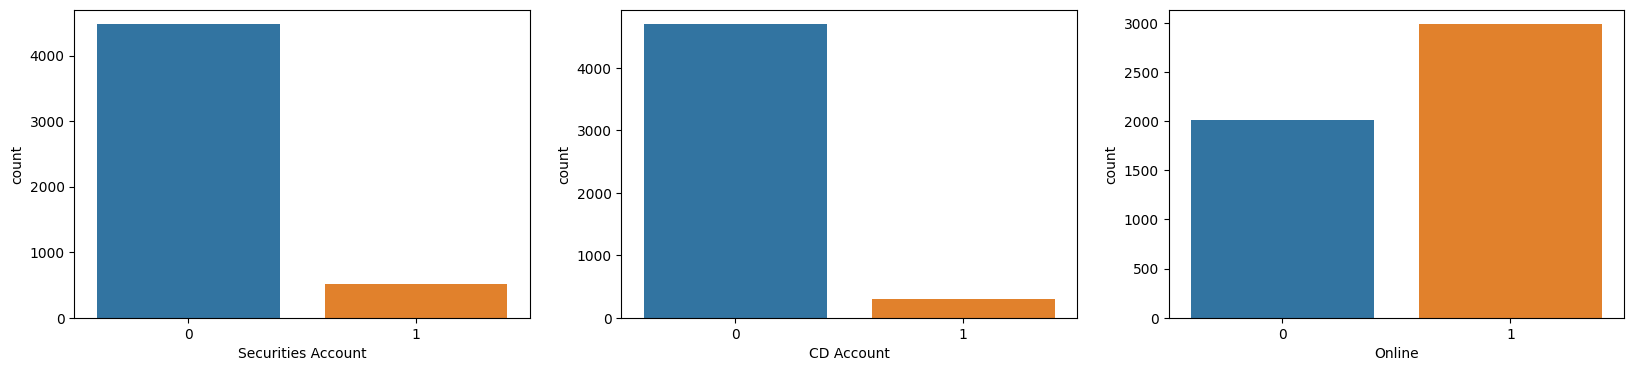

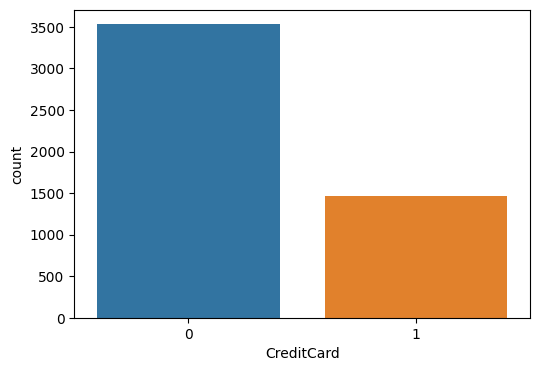

In [9]:
# Categorical features
cat_features = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
i = 0
while i < 8 :
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 3, 1)
    sns.countplot(x = cat_features[i], data=Data)
    i += 1
    if i == 7:
        break
        
    plt.subplot(1, 3, 2)
    sns.countplot(x = cat_features[i], data=Data)
    i += 1

    plt.subplot(1, 3, 3)
    sns.countplot(x = cat_features[i], data=Data)
    i += 1
    plt.show()
    
    

#### We Do not have Noise in categorical features

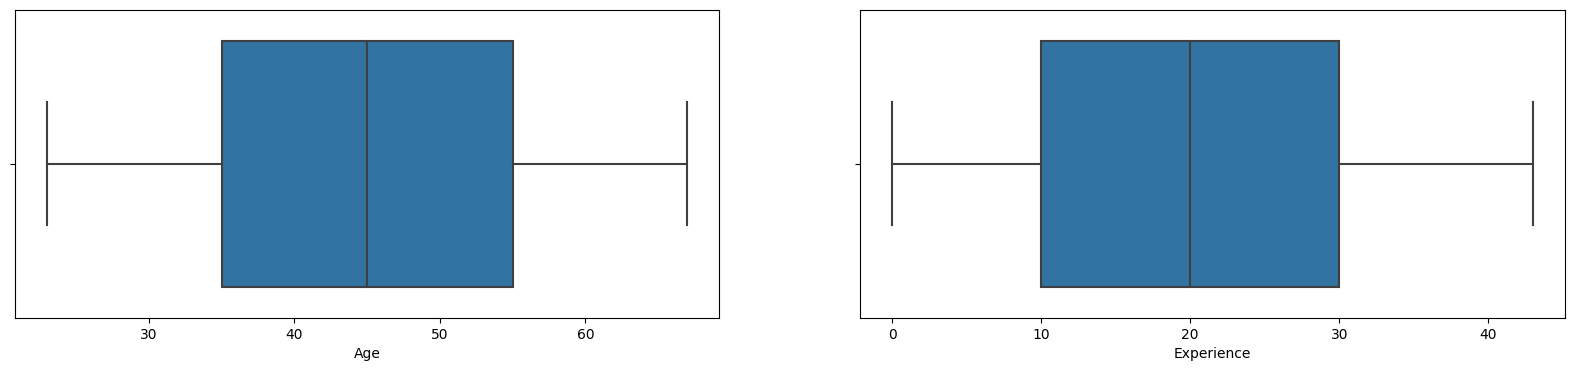

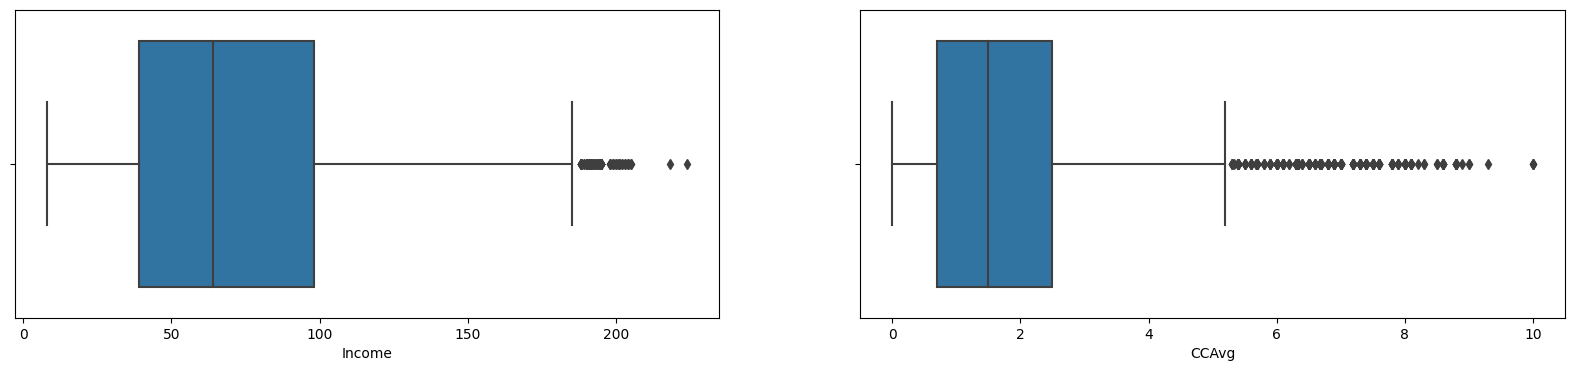

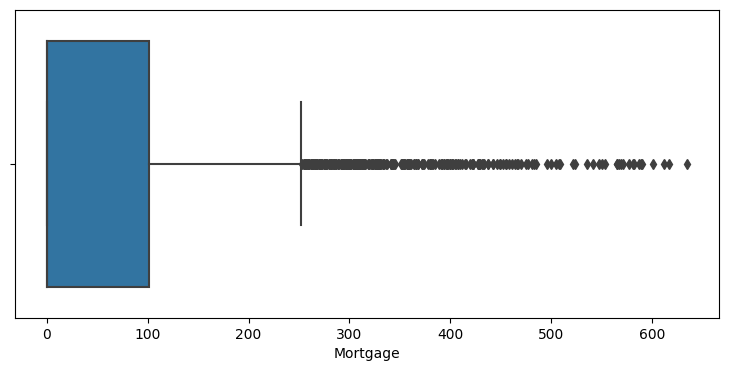

In [10]:
# Numerical Features
num_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
i = 0
while i < 6 :
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x = num_features[i], data=Data)
    i += 1
    if i == 5 :
        break
    plt.subplot(1, 2, 2)
    sns.boxplot(x = num_features[i], data=Data)
    i += 1
   
    
    plt.show()
    

#### Do not have Noise

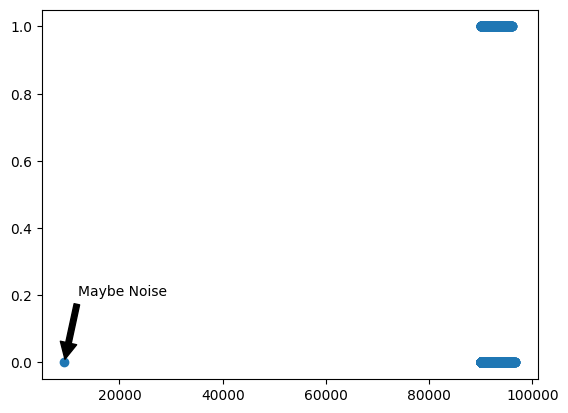

In [11]:
# Zip Code
plt.scatter(Data['ZIP Code'], Data['Personal Loan'])
plt.annotate(text='Maybe Noise', xy = (9307, 0), xytext = (12000, .2), arrowprops = dict(facecolor = 'black', shrink=0.05))
plt.show()

In [12]:
Data["ZIP Code"].nsmallest()

384      9307
652     90005
1469    90005
1619    90005
1681    90005
Name: ZIP Code, dtype: int64

In [13]:
# Drop our noise in zip code
Data.drop(labels=384, axis=0, inplace=True)

In [14]:
list_zipcode = list(Data['ZIP Code'])


In [15]:
Data["ZIP Code"].describe()

count     4999.000000
mean     93169.275455
std       1759.630610
min      90005.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

In [16]:
country = []
lat = []
long = []
for x in list_zipcode :
    my_city_county = zcode.matching(str(x))
    if len (my_city_county) == 1 :
        county = my_city_county[0].get('county')
        Lat = my_city_county[0].get('lat')
        Long = my_city_county[0].get('long')
    else :
        county = 'notfound'
        Lat = np.NaN
        Long = np.NaN
    country.insert(0,county)
    lat.insert(0,Lat)
    long.insert(0,Long)
country.reverse()
lat.reverse()
long.reverse()
Data['place'] = country
Data['latitude'] = lat
Data['longtitude'] = long

In [17]:
Data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,place,latitude,longtitude
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273


In [18]:
Data = Data.astype({'latitude':float, 'longtitude':float})

In [19]:
Data.describe(include = 'all')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,place,latitude,longtitude
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999,4966.000000,4966.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN
mean,45.337267,20.133627,73.784757,93169.275455,2.396079,1.938206,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859,NaN,35.792110,-120.037847
std,11.464033,11.416124,46.032281,1759.630610,1.147554,1.747731,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574,NaN,2.098821,2.092821
min,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,32.554700,-124.099400
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,34.003300,-122.148500
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,35.373600,-120.042400
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,37.748700,-118.089400


In [20]:
Data[Data['place']=='notfound']['ZIP Code'].value_counts()

92717    22
96651     6
92634     5
Name: ZIP Code, dtype: int64

In [21]:
def Highlight_cols(s):
    color = 'yellow'
    return 'background-color : %s' %color

In [22]:
z_92717 = list(Data[Data['ZIP Code']==92717].index)
for x in z_92717:
    Data['place'].loc[x] = 'irvine'
    Data['latitude'].loc[x] = 33.6462
    Data['longtitude'].loc[x] = -117.8398
    
Data[Data['ZIP Code'] == 92717].style.applymap(Highlight_cols, subset = pd.IndexSlice[:, ['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,place,latitude,longtitude
106,43,17,69,92717,4,2.900000,1,0,0,0,0,1,1,irvine,33.646200,-117.839800
172,38,13,171,92717,2,7.800000,1,0,0,0,0,1,0,irvine,33.646200,-117.839800
184,52,26,63,92717,2,1.500000,2,0,0,1,0,1,0,irvine,33.646200,-117.839800
321,44,20,101,92717,3,4.400000,2,82,1,0,0,0,0,irvine,33.646200,-117.839800
366,50,24,35,92717,1,0.300000,3,0,0,0,0,1,0,irvine,33.646200,-117.839800
476,60,34,53,92717,1,0.800000,2,0,0,1,0,0,1,irvine,33.646200,-117.839800
695,29,4,115,92717,1,1.900000,1,0,0,0,0,0,0,irvine,33.646200,-117.839800
721,49,24,39,92717,1,1.400000,3,0,0,0,0,1,0,irvine,33.646200,-117.839800
1099,30,6,52,92717,3,0.700000,2,0,0,0,0,1,0,irvine,33.646200,-117.839800
1189,42,17,115,92717,2,0.400000,1,0,0,0,0,1,0,irvine,33.646200,-117.839800


In [23]:
z_96651 = list(Data[Data['ZIP Code']==96651].index)
for x in z_96651:
    Data['place'].loc[x] = 'El Dorado'
    Data['latitude'].loc[x] = 38.81781
    Data['longtitude'].loc[x] = -120.92925
    
Data[Data['ZIP Code'] == 96651].style.applymap(Highlight_cols, subset = pd.IndexSlice[:, ['Personal Loan']])
    

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,place,latitude,longtitude
630,32,7,35,96651,3,1.300000,1,108,0,0,0,0,1,El Dorado,38.817810,-120.929250
672,51,27,23,96651,1,0.200000,1,0,0,0,0,1,0,El Dorado,38.817810,-120.929250
1426,37,11,60,96651,3,0.500000,3,0,0,0,0,1,0,El Dorado,38.817810,-120.929250
1653,26,1,24,96651,2,0.900000,3,123,0,0,0,0,1,El Dorado,38.817810,-120.929250
2731,29,5,28,96651,1,0.200000,3,0,0,0,0,1,0,El Dorado,38.817810,-120.929250
3525,59,34,13,96651,4,0.900000,2,0,0,0,0,0,0,El Dorado,38.817810,-120.929250


In [24]:
z_92634 = list(Data[Data['ZIP Code']==92634].index)
for x in z_92634:
    Data['place'].loc[x] = 'Fullerton'
    Data['latitude'].loc[x] = 33.8739
    Data['longtitude'].loc[x] = -117.9028
    
Data[Data['ZIP Code'] == 92634].style.applymap(Highlight_cols, subset = pd.IndexSlice[:, ['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,place,latitude,longtitude
468,34,10,21,92634,1,0.500000,3,0,0,0,0,1,0,Fullerton,33.873900,-117.902800
780,32,7,42,92634,4,0.800000,1,0,0,0,0,1,1,Fullerton,33.873900,-117.902800
2218,38,13,9,92634,2,0.300000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800
3887,24,2,118,92634,2,7.200000,1,0,0,1,0,1,0,Fullerton,33.873900,-117.902800
4392,52,27,81,92634,4,3.800000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800


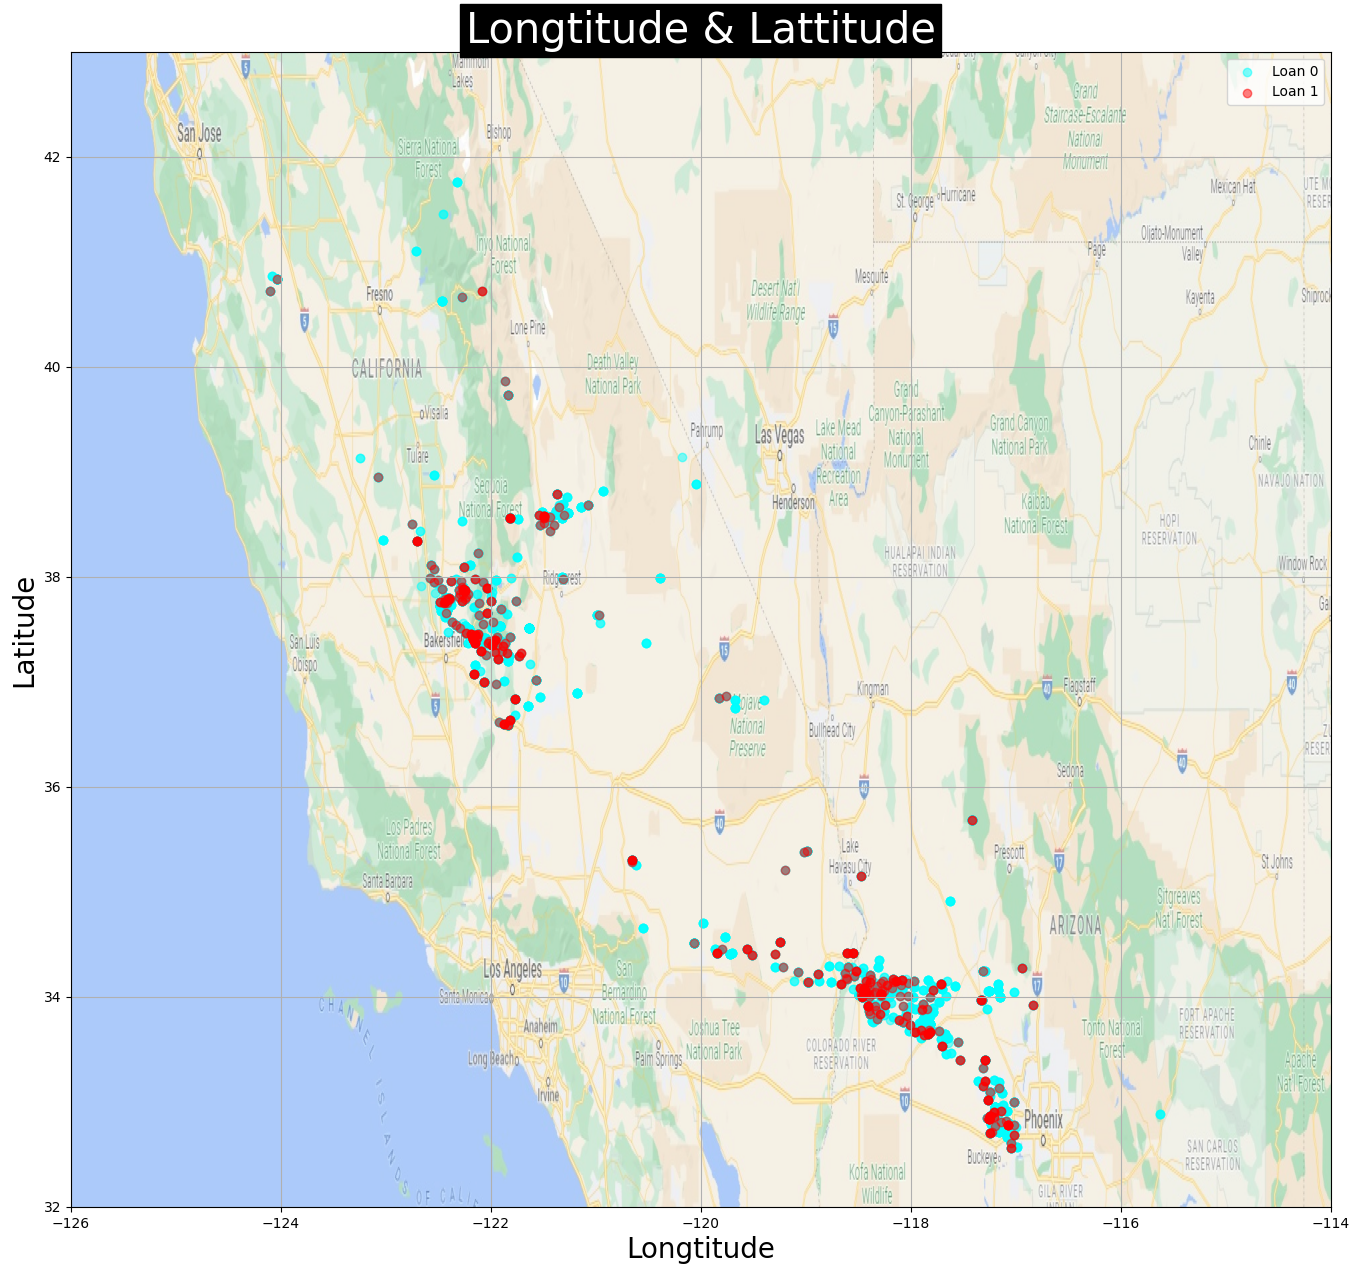

In [25]:
img = plt.imread('E:\hamid\hushe masnue imt1\Data\Bank classification Project\map.jpg')
# Separate by Personal Loan
target_0 = Data[Data['Personal Loan'] == 0]
target_1 = Data[Data['Personal Loan'] == 1]
# Plot
fig, axs = plt.subplots(figsize = (25, 15))
#show pic in background
axs.imshow(img, extent=[-126, -114, 32, 43], alpha = 0.7)
# Scatter plot
axs.scatter(target_0['longtitude'], target_0['latitude'], c='cyan', alpha = 0.5, label = 'Loan 0')
axs.scatter(target_1['longtitude'], target_1['latitude'], c='r', alpha = 0.5, label = 'Loan 1')
plt.title('Longtitude & Lattitude', fontsize=30, backgroundcolor = 'black', c = 'white')
plt.xlabel('Longtitude', fontsize = 20)
plt.ylabel('Latitude', fontsize = 20)
plt.grid()
plt.legend(loc='best')
plt.show()

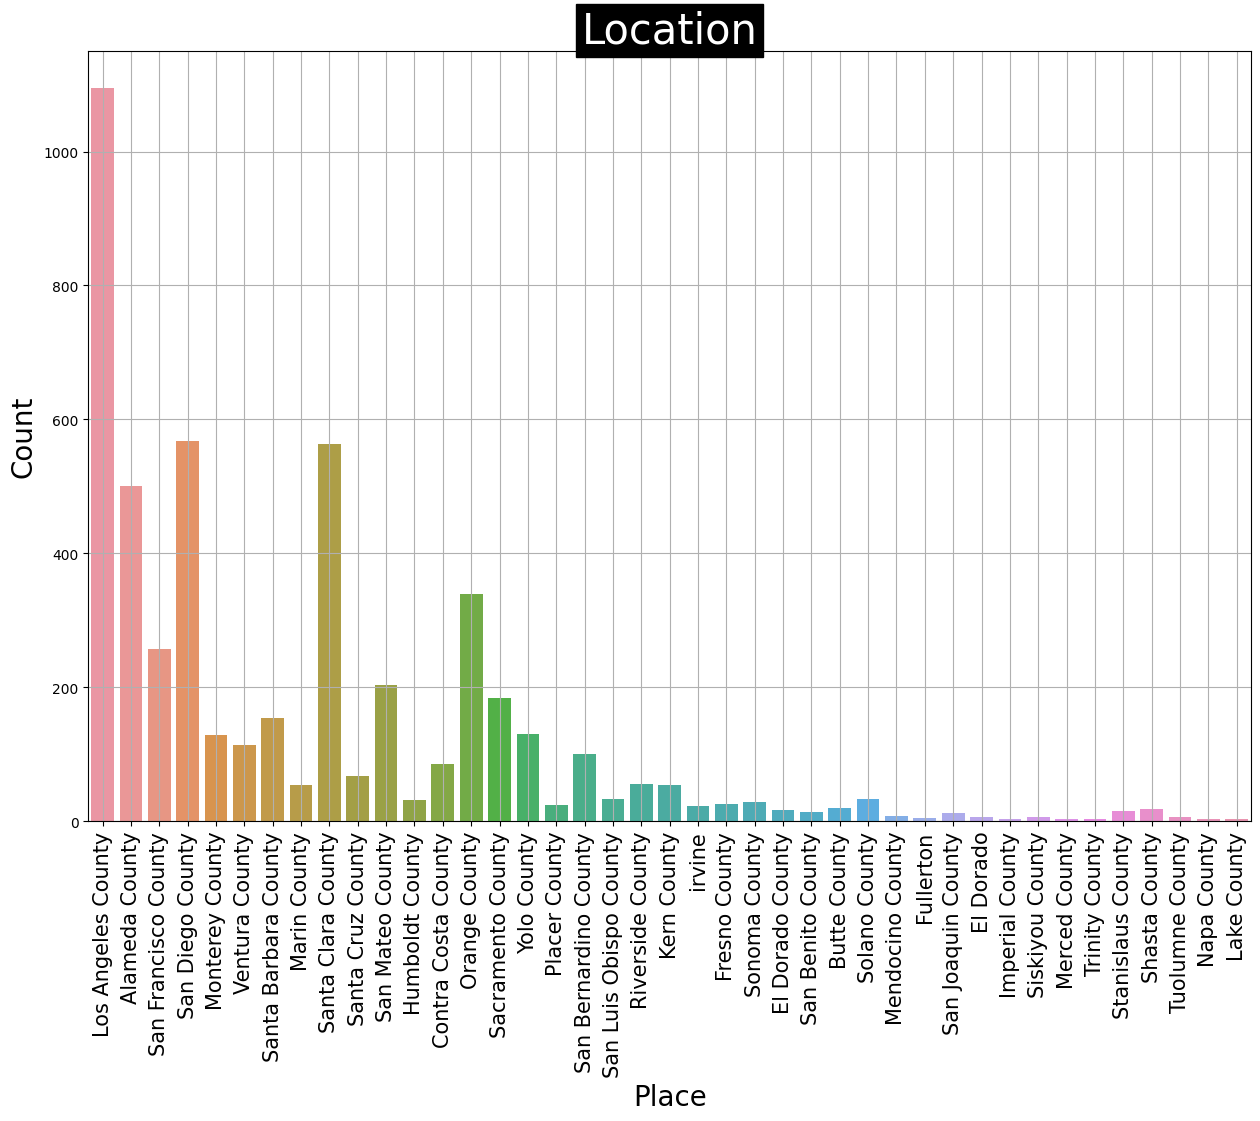

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(x='place', data=Data)
plt.title("Location", fontsize=30, backgroundcolor = 'black', c = 'white')
plt.grid()
plt.xticks(rotation = 90, fontsize=15)
plt.xlabel("Place", fontsize=20)
plt.ylabel('Count', fontsize = 20)
plt.show()


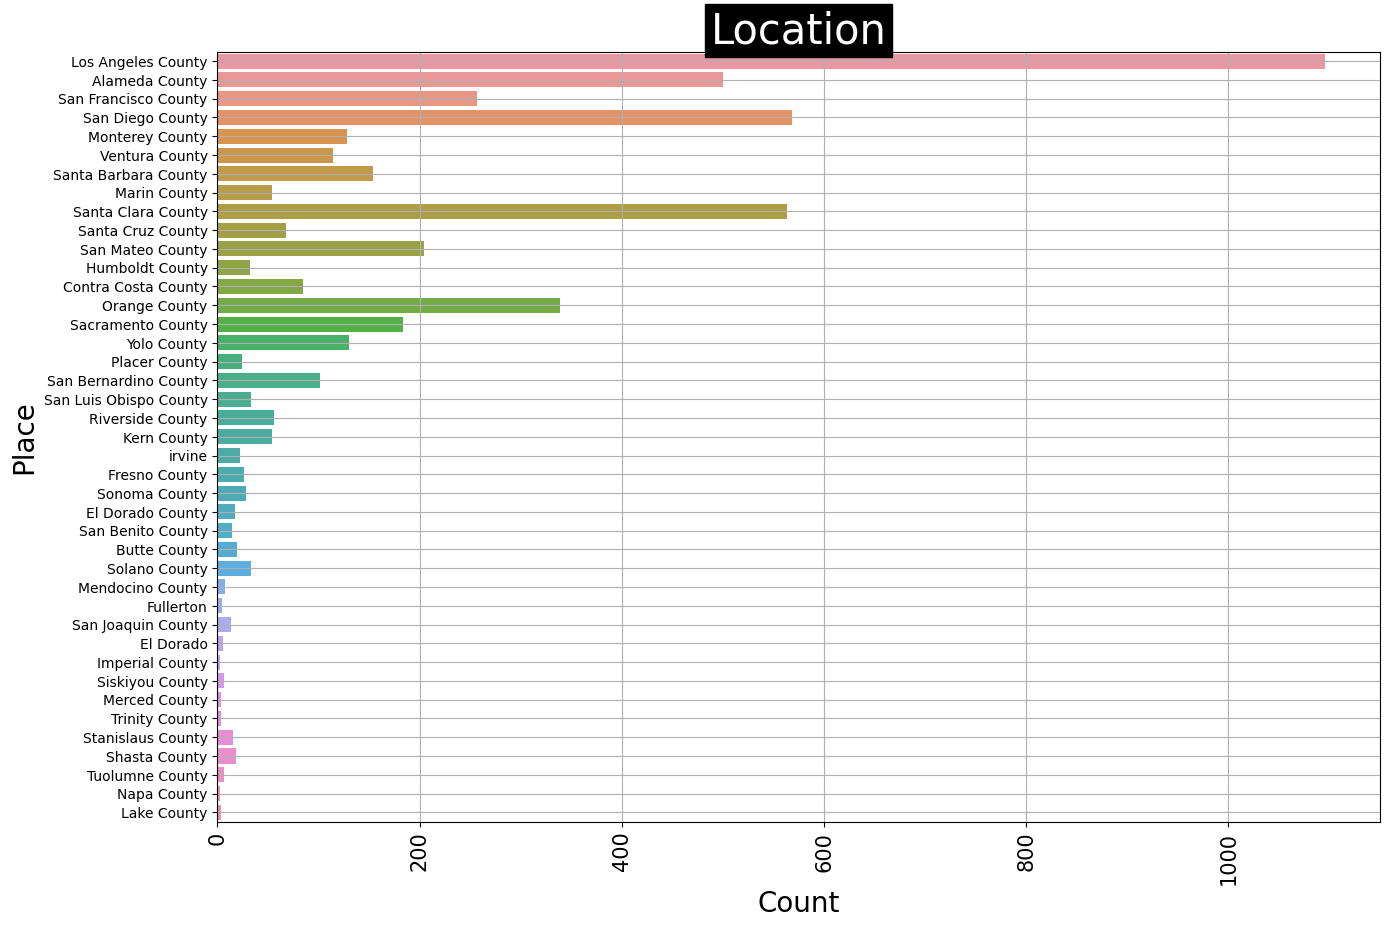

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(y='place', data=Data)
plt.title("Location", fontsize=30, backgroundcolor = 'black', c = 'white')
plt.grid()
plt.xticks(rotation = 90, fontsize=15)
plt.ylabel("Place", fontsize=20)
plt.xlabel('Count', fontsize = 20)
plt.show()

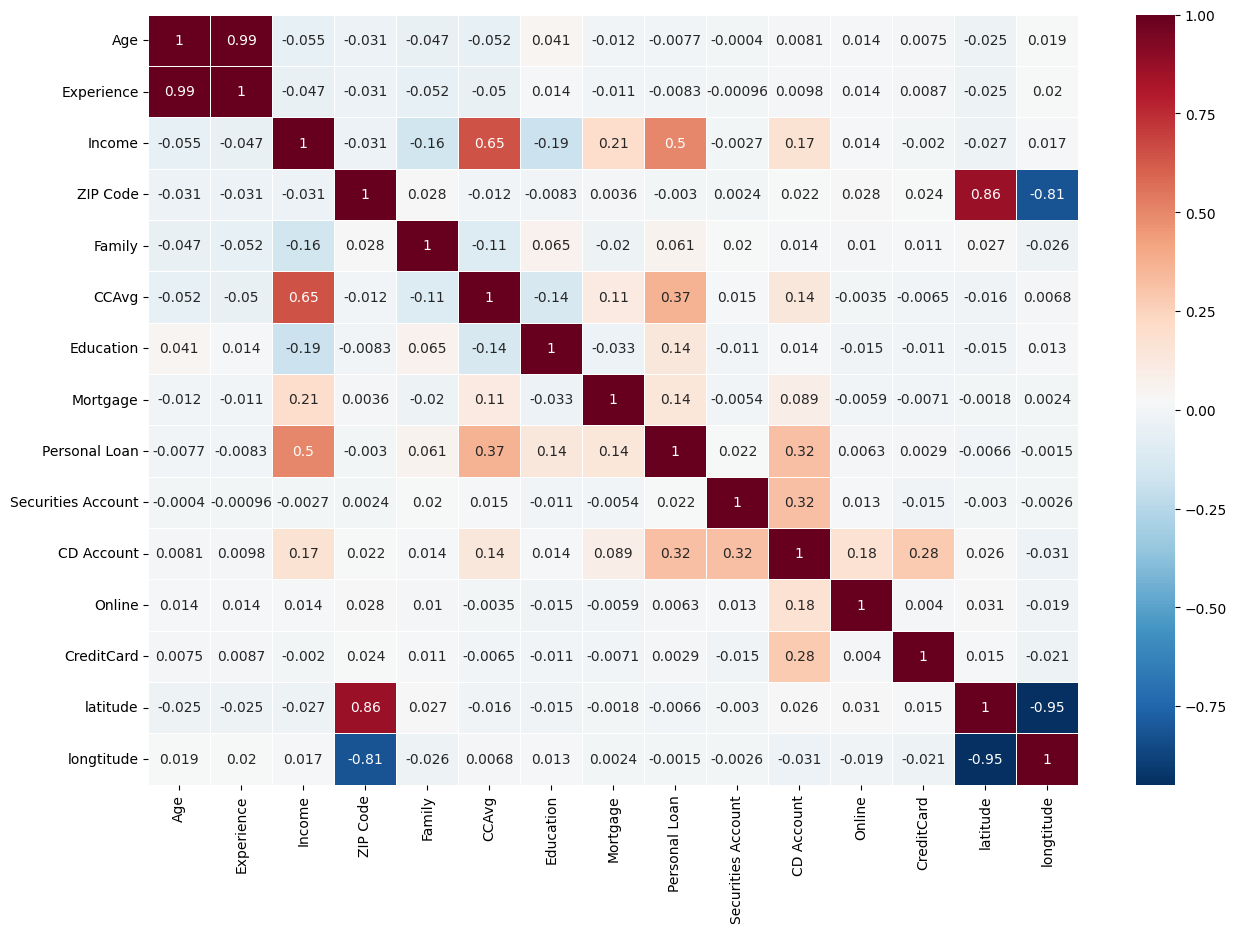

In [28]:
fig , ax = plt.subplots(figsize = (15, 10))
sns.heatmap(Data.corr(), cmap = 'RdBu_r', cbar = True, annot = True, linewidths=0.5, ax= ax)
plt.show()

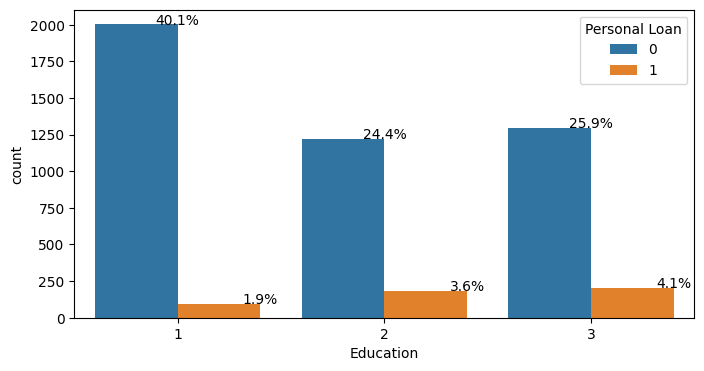

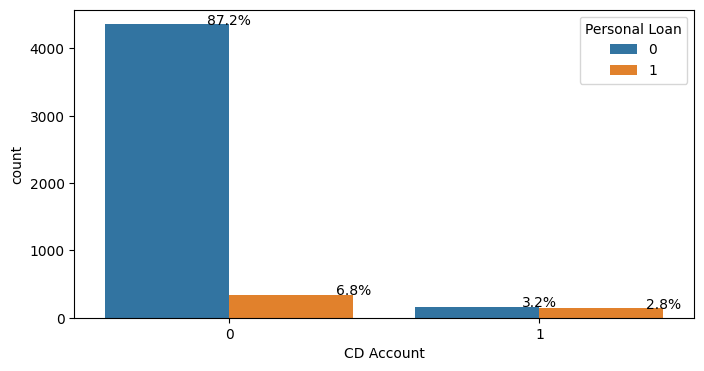

In [29]:
col_categorical = ['Education', 'CD Account' ]
total = float(len(Data))
i = 0
while i < 2 :
    
    fig = plt.figure(figsize=[8,4])
    ax = sns.countplot(x=col_categorical[i], data=Data, hue='Personal Loan')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()
    i += 1
  
plt.show()

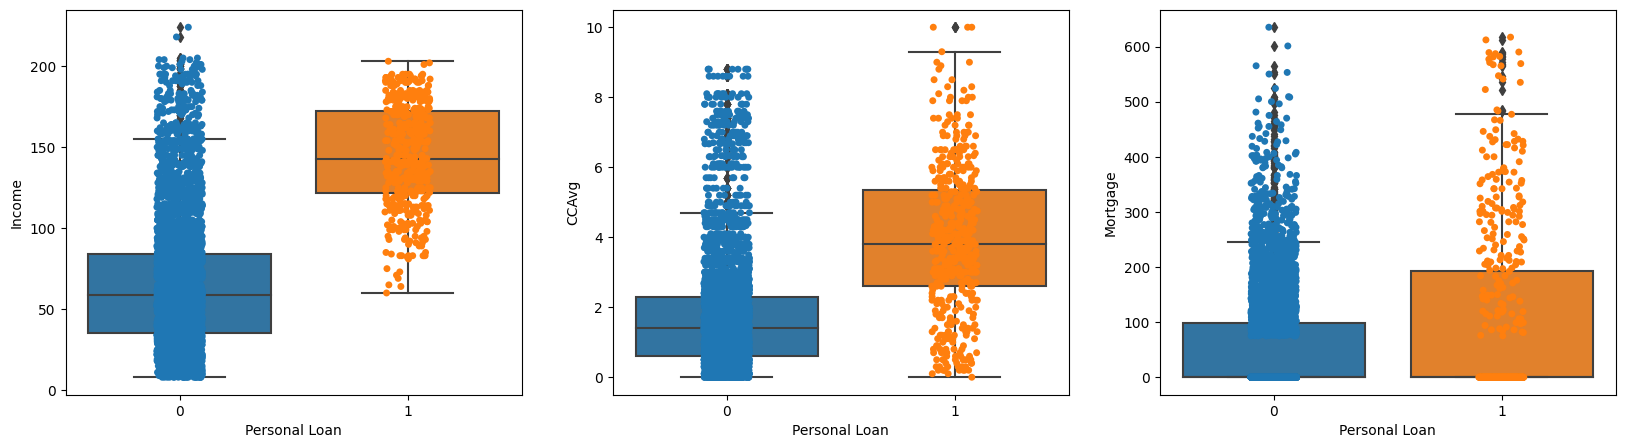

In [30]:
col_numerical = ['Income', 'CCAvg', 'Mortgage' ]

i = 0
while i < 3 :
    fig = plt.figure(figsize=[20,5])
    plt.subplot(1, 3, 1)
    ax= sns.boxplot(x='Personal Loan',y=col_numerical[i],data=Data)
    ax = sns.stripplot(x="Personal Loan", y=col_numerical[i],data=Data)
    i += 1
    if i ==3 :
        break
    plt.subplot(1, 3, 2)
    ax= sns.boxplot(x='Personal Loan',y=col_numerical[i],data=Data)
    ax = sns.stripplot(x="Personal Loan", y=col_numerical[i],data=Data)
    i += 1
    
    plt.subplot(1, 3, 3)
    ax= sns.boxplot(x='Personal Loan',y=col_numerical[i],data=Data)
    ax = sns.stripplot(x="Personal Loan", y=col_numerical[i],data=Data)
    i += 1
    plt.show()
    
    
plt.show()

# Modeling

### LOG Regression

In [31]:
X = Data.drop(columns=['Personal Loan', 'place'], axis = 1)
y = Data['Personal Loan'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# find best model by GridesearchCV by accuracy

parameters = [{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 'C': [0.001,0.01,0.1,0.25,0.5,0.75,1, 100, 1000],
              'class_weight':['balanced', None], 'penalty':['l2', 'l1']}]
grid_search = GridSearchCV(LogisticRegression(), # Model
                      param_grid= parameters, # our parameters
                      scoring='accuracy', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1) 

grid_search.fit(X_train, y_train.ravel())
grid_search.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


LogisticRegression(C=0.75, penalty='l1', solver='liblinear')

In [33]:
# Build Model by GrideSearchCV best parameters

lgreg = LogisticRegression(solver='liblinear', penalty='l1', C=100, n_jobs=-1) 
lgreg.fit(X_train, y_train.ravel())
y_pred = lgreg.predict(X_test) 

# calculate accuracy

print("Accuracy : %.5f" %metrics.accuracy_score(y_test, y_pred)) 

Accuracy : 0.94500


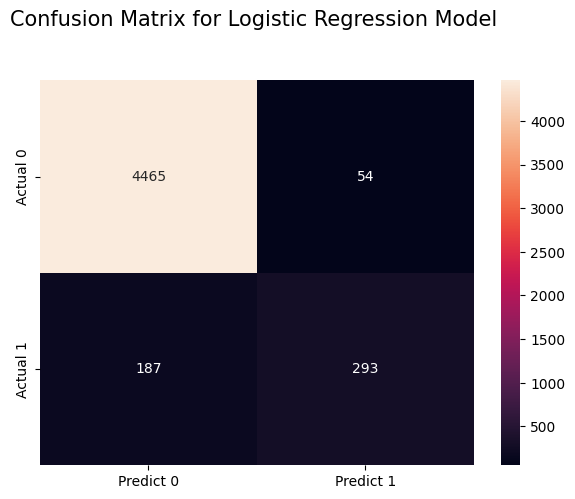

----------------Clasification Report-------------------

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4519
           1       0.84      0.61      0.71       480

    accuracy                           0.95      4999
   macro avg       0.90      0.80      0.84      4999
weighted avg       0.95      0.95      0.95      4999



In [34]:
# confusion matrix for all data
confus_matrix = confusion_matrix(y, lgreg.predict(X))
logistic_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Logistic Regression Model \n\n ', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g')
plt.show()

# classification report for all data

print('----------------Clasification Report-------------------\n')
print(metrics.classification_report(y, lgreg.predict(X)))

## Model evaluation criterion

#### Model wrong predictions as:

1. Predicting a person will buy a loan but he actually doesn't.(FP)
2. Predicting a person will not buy a loan but he actually does.(FN)

# Wich model wrong predictions is important :

- 2nd case (FN) is more important to us .A customer is missed by the marketing team .It's lost of opportunity.So we want to minimize this loss(FN).
- We have to maximize recall to reduce FN *(recall = TP/(TP+FN)) 
- we can use of GridesearchCV by *(scoring : recall)

In [35]:
# find best model by GridesearchCV by recall

parameters = [{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 'C': [0.001,0.01,0.1,0.25,0.5,0.75,1, 100, 1000],
              'class_weight':['balanced', None], 'penalty':['l2', 'l1']}]
grid_search = GridSearchCV(LogisticRegression(), # Model
                      param_grid= parameters, # parameters
                      scoring='recall', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1) 

grid_search.fit(X_train, y_train.ravel())
grid_search.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [36]:
# creat new model for increase recall evaluation
lgreg1 = LogisticRegression(solver='liblinear', penalty='l1', C=0.01, class_weight='balanced') 
lgreg1.fit(X_train, y_train.ravel())
y_pred1 = lgreg1.predict(X_test) 

# calculate accuracy

print("Accuracy : %.5f" %metrics.accuracy_score(y_test, y_pred1)) 

Accuracy : 0.89400


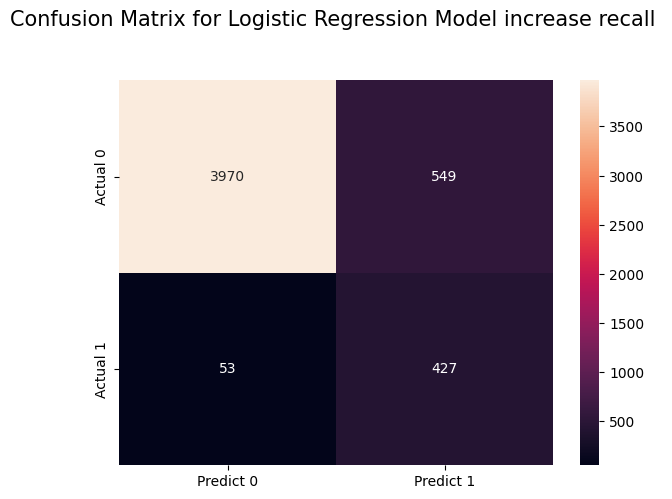

----------------Clasification Report increase recall-------------------

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4519
           1       0.44      0.89      0.59       480

    accuracy                           0.88      4999
   macro avg       0.71      0.88      0.76      4999
weighted avg       0.93      0.88      0.90      4999



In [37]:
# confusion matrix by new model increase recall

confus_matrix = confusion_matrix(y, lgreg1.predict(X))
logistic_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Logistic Regression Model increase recall \n\n ', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g')
plt.show()

# classification report for all data

print('----------------Clasification Report increase recall-------------------\n')
print(metrics.classification_report(y, lgreg1.predict(X)))

We have more recall than the previous model and we have fewer false negatives(FN) than the previous model, and the accuracy of the model is lower but In the new model *(lgreg1), with the reduction of false negatives, it is more acceptable for our data

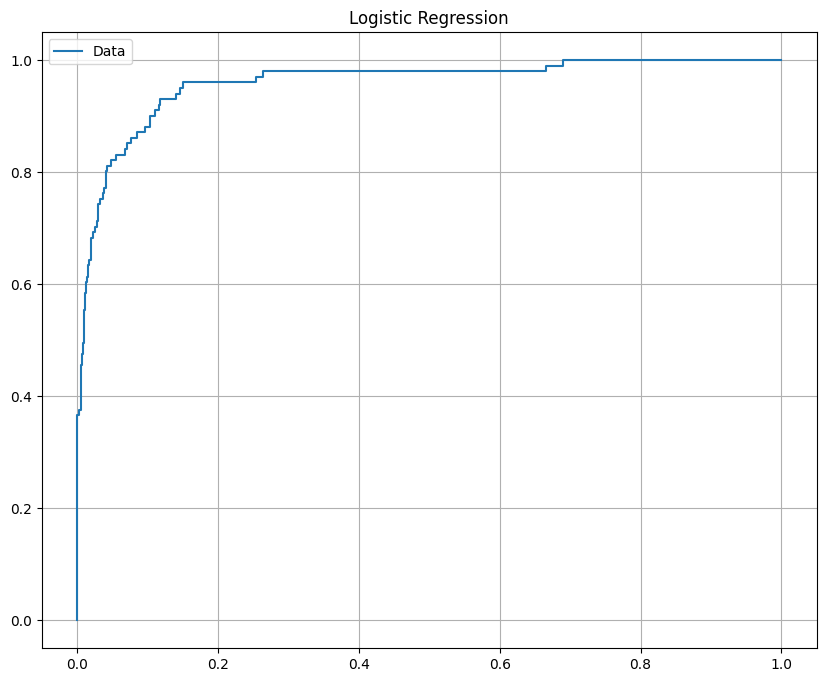

In [45]:
y_pred_proba = lgreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label="Data")
plt.title('Logistic Regression')
plt.legend(loc="best")
plt.grid()
plt.show()

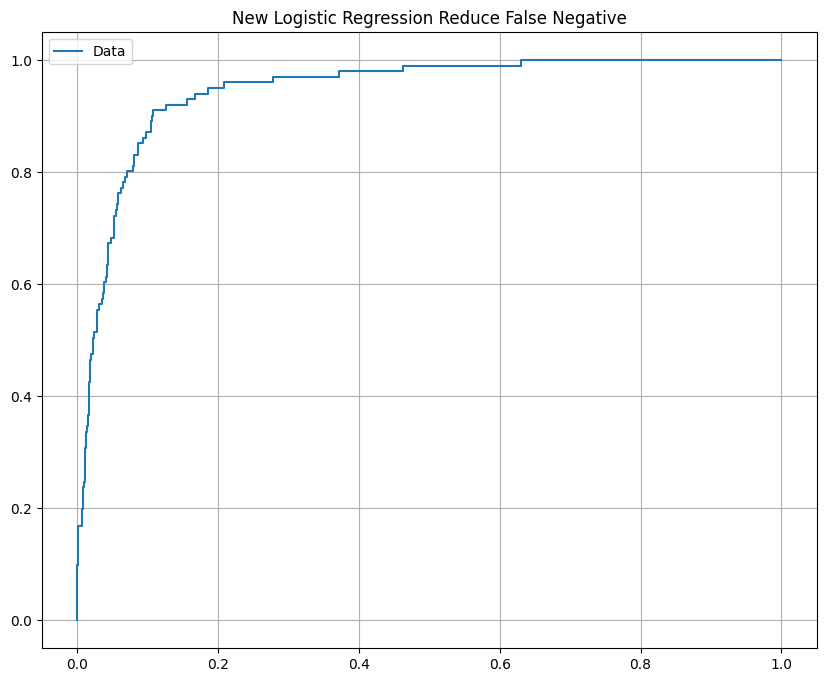

In [44]:
y_pred_proba_new = lgreg1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_new)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label="Data")
plt.title('New Logistic Regression Reduce False Negative')
plt.legend(loc="best")
plt.grid()
plt.show()

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

## KNN

In [46]:
X = Data.drop(columns=['Personal Loan', 'place'], axis = 1)
y = Data['Personal Loan'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
k=40
acc = np.zeros((k))

for i in range(1, k+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train.ravel())
    y_pred_KNN = knn.predict(X_test)
    acc[i-1] = metrics.accuracy_score(y_test, y_pred_KNN)
print('acc : ', acc)
print('acc min :', np.min(acc))
print('acc max :',np.max(acc))

acc :  [0.885 0.89  0.896 0.898 0.898 0.9   0.899 0.899 0.904 0.901 0.9   0.9
 0.903 0.9   0.899 0.9   0.901 0.9   0.899 0.897 0.899 0.898 0.897 0.898
 0.899 0.897 0.898 0.899 0.898 0.899 0.899 0.899 0.899 0.899 0.899 0.899
 0.899 0.899 0.899 0.899]
acc min : 0.885
acc max : 0.904


In [54]:
# GridSearchCV for knn by accuracy evaluate

parameters = [{"n_neighbors": range(1, 50), 'weights':['distance','uniform'], 'algorithm':['auto', 'ball_tree', 'kd_tree','brute'],
              'p':[1,2]}]
grid_kn = GridSearchCV(estimator=knn, # Model
                      param_grid= parameters, # Range of k
                      scoring='accuracy', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1)

grid_kn.fit(X_train, y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 784 candidates, totalling 3920 fits


{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

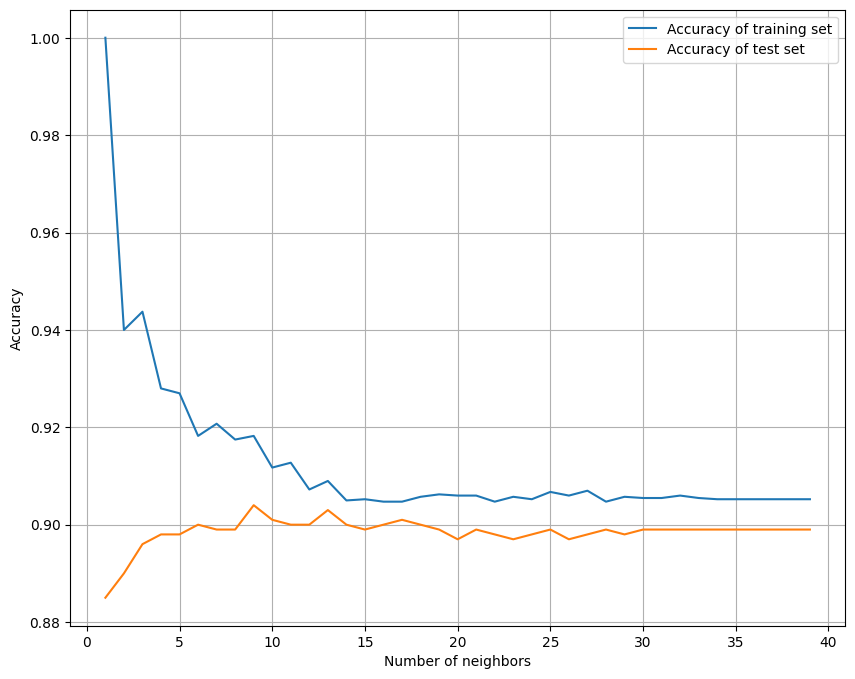

In [56]:
training_acc = []
test_acc = []

# try KNN for diffrent k neighbor from 1 to 40
neighbors_setting = range(1,40)

for n_neighbors in neighbors_setting:
    Knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    Knn.fit(X_train, y_train.ravel())
    training_acc.append(Knn.score(X_train, y_train))
    test_acc.append(Knn.score(X_test, y_test))
plt.figure(figsize=(10,8))   
plt.plot(neighbors_setting, training_acc, label='Accuracy of training set')
plt.plot(neighbors_setting, test_acc, label='Accuracy of test set')
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.grid()
plt.legend()
plt.show()

In [58]:
# best parameters for maximize accuracy

knn = KNeighborsClassifier(n_neighbors=9, weights='distance', p=1, algorithm='auto')
knn.fit(X_train, y_train.ravel())
y_pred_KNN = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_KNN))

0.899


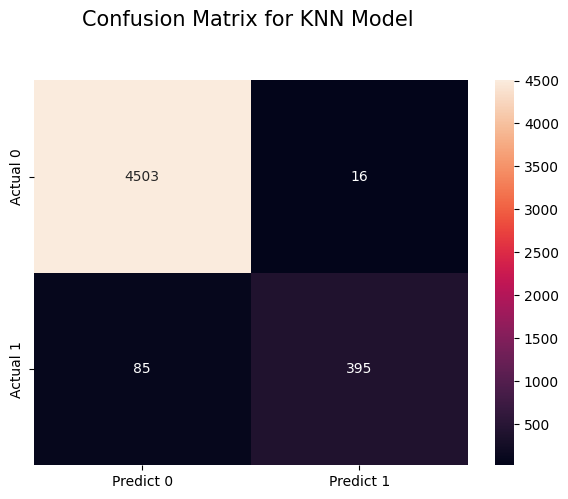

----------------Clasification Report KNN -------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4519
           1       0.96      0.82      0.89       480

    accuracy                           0.98      4999
   macro avg       0.97      0.91      0.94      4999
weighted avg       0.98      0.98      0.98      4999



In [59]:
confus_matrix = confusion_matrix(y, knn.predict(X))
logistic_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for KNN Model \n\n ', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g')
plt.show()

# classification report for all data

print('----------------Clasification Report KNN -------------------\n')
print(metrics.classification_report(y, knn.predict(X)))

### Reduce False Negative (Increase recall evaluate) for KNN Model

In [61]:

parameters = [{"n_neighbors": range(1, 50), 'weights':['distance','uniform'], 'algorithm':['auto', 'ball_tree', 'kd_tree','brute'],
              'p':[1,2]}]
grid_kn = GridSearchCV(estimator=Knn, # Model
                      param_grid= parameters, # Range of k
                      scoring='recall', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1) # Help to cpu

grid_kn.fit(X_train, y_train.ravel())
grid_kn.best_estimator_

Fitting 5 folds for each of 784 candidates, totalling 3920 fits


KNeighborsClassifier(n_neighbors=1, weights='distance')

In [62]:
# Model for increase recall

knn1 = KNeighborsClassifier(n_neighbors=1, weights='distance', p=1)
knn1.fit(X_train, y_train.ravel())
y_pred_KNN = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_KNN))

0.882


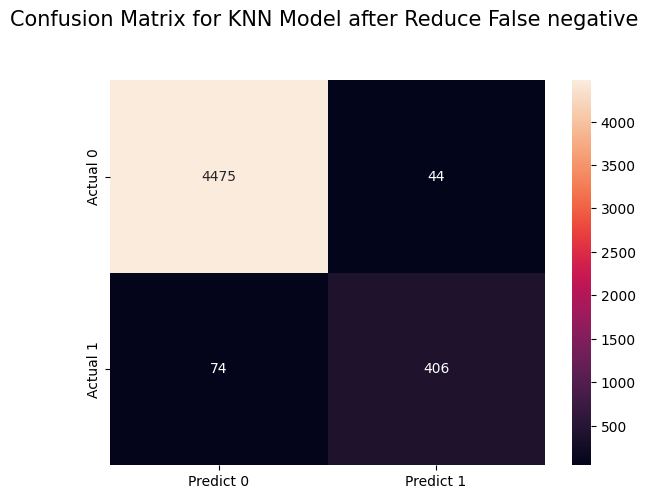

----------------Clasification Report KNN increase recall -------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4519
           1       0.90      0.85      0.87       480

    accuracy                           0.98      4999
   macro avg       0.94      0.92      0.93      4999
weighted avg       0.98      0.98      0.98      4999



In [64]:
# Confusion Matrix for KNN Model after Reduce False negative
confus_matrix = confusion_matrix(y, knn1.predict(X))
logistic_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for KNN Model after Reduce False negative \n\n ', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g')
plt.show()

# classification report for all data

print('----------------Clasification Report KNN increase recall -------------------\n')
print(metrics.classification_report(y, knn1.predict(X)))

In [93]:
print('----------------Clasification Report KNN  -------------------\n')
print(metrics.classification_report(y, knn1.predict(X)))
print('----------------Clasification Report Logistic Regression -------------------\n')
print(metrics.classification_report(y, lgreg1.predict(X)))

----------------Clasification Report KNN  -------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4519
           1       0.90      0.85      0.87       480

    accuracy                           0.98      4999
   macro avg       0.94      0.92      0.93      4999
weighted avg       0.98      0.98      0.98      4999

----------------Clasification Report Logistic Regression -------------------

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4519
           1       0.44      0.89      0.59       480

    accuracy                           0.88      4999
   macro avg       0.71      0.88      0.76      4999
weighted avg       0.93      0.88      0.90      4999



### Predict new sample

In [65]:
New_sample = pd.DataFrame({'Age':[42] ,'Experience' : [16],'Income' : [30],'ZIPCode' : [92037],'Family' : [3],'CCAvg' : [1.2],
                   'Education' : [3],'Mortgage' : [0],'SecuritiesAccount' : [1],'CDAccount' : [0],'Online' : [1],'CreditCard' : [1]})
New_sample

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,42,16,30,92037,3,1.2,3,0,1,0,1,1


In [71]:
New_sample_location = zcode.matching('92037')
lat = New_sample_location[0].get('lat')
long = New_sample_location[0].get('long')

In [72]:
New_sample.insert(12, 'lat', lat )
New_sample.insert(13, 'long', long )

In [73]:
New_sample

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,lat,long
0,42,16,30,92037,3,1.2,3,0,1,0,1,1,32.8668,-117.2482


In [94]:
print('New data Class :' ,lgreg1.predict(New_sample)[0])
print('New data Class probability:' ,lgreg1.predict_proba(New_sample)[0], '[Class 0 Class 1]')

New data Class : 0
New data Class probability: [0.94968911 0.05031089] [Class 0 Class 1]


In [75]:
print('New data Class :' ,knn1.predict(New_sample)[0])
print('New data Class probability:' ,knn1.predict_proba(New_sample)[0], '[Class 0 Class 1]')

New data Class : 0
New data Class probability: [1. 0.] [Class 0 Class 1]


# Thanks for you'r attention